In [40]:
from power import Battery, Network, Bus
from power.systems import B6L8Charged, IEEE118Charged
import numpy as np
from copy import deepcopy
from trabalhos_transmissao.utils.load_scen import apply_load_scen
from trabalhos_transmissao.utils.wnd_scen import apply_wnd_scen
import matplotlib.pyplot as plt
from optimal_power_flow.linear_opf.opf_loss import LinearDispatch
from power import *

In [68]:
# Sistema Bateria e Carga
net = Network(sb_mva=100)
bus1 = Bus(net, id=1, name="Bus 1")
bus2 = Bus(net, id=2, name="Bus 2")
l1 = Line(id=1, from_bus=bus1, to_bus=bus2, x_pu=0.1, flow_max_pu=90)
Battery(id=1, bus=bus1, p_max_mw=90, p_min_mw=-80, capacity_mwh=100, soc_mwh=100, cost_charge_mw=0, cost_discharge_mw=399)
Load(id=1, bus=bus2, p_mw=80, cost_shed_mw=400)

solver = LinearDispatch(net=net)
results = solver.solve_loss(verbose=True)
print(results["Battery"])


Solução encontrada após 1 iterações.
Perdas Totais do Sistema: 0.0000 MW
Curtailment Total: 0.0000 MW
Shed Total: 0.0000 MW
           P_Out_MW  P_In_MW  ...  Dual_Lower_SOC  Dual_Upper_SOC
Battery_1      80.0      0.0  ...             0.0             0.0

[1 rows x 10 columns]


In [67]:
# Sistema Bateria e Eolico
net = Network(sb_mva=100)
bus1 = Bus(net, id=1, name="Bus 1")
bus2 = Bus(net, id=2, name="Bus 2")
line = Line(id=1, from_bus=bus1, to_bus=bus2, x_pu=0.1, flow_max_pu=90)
wnd = WindGenerator(id=1, bus=bus2, p_max_mw=80)
bat = Battery(id=1, bus=bus1, p_max_mw=100, p_min_mw=-100, capacity_mwh=100, soc_mwh=20, cost_charge_mw=-0.1, cost_discharge_mw=399)

solver = LinearDispatch(net=net)
results = solver.solve_loss(verbose=True)
print(results["Battery"])


Solução encontrada após 1 iterações.
Perdas Totais do Sistema: 0.0000 MW
Curtailment Total: 0.0000 MW
Shed Total: 0.0000 MW
           P_Out_MW  P_In_MW  ...  Dual_Lower_SOC  Dual_Upper_SOC
Battery_1       0.0     80.0  ...             0.0           -10.0

[1 rows x 10 columns]


In [79]:
# Sistema Bateria e Eolico 
net = Network(sb_mva=100)
bus1 = Bus(net, id=1, name="Bus 1")
bus2 = Bus(net, id=2, name="Bus 2")
bus3 = Bus(net, id=3, name="Bus 3")

line1 = Line(id=1, from_bus=bus1, to_bus=bus2, x_pu=0.1, flow_max_pu=0.6)
line2 = Line(id=2, from_bus=bus2, to_bus=bus3, x_pu=0.1, flow_max_pu=0.5)
line3 = Line(id=3, from_bus=bus1, to_bus=bus3, x_pu=0.1, flow_max_pu=0.4)

wnd = WindGenerator(id=1, bus=bus1, p_max_mw=150)
bat = Battery(id=1, bus=bus2, p_max_mw=90, p_min_mw=-100, capacity_mwh=100, soc_mwh=50, cost_charge_mw=-1, cost_discharge_mw=399)
load = Load(id=1, bus=bus3, p_mw=100, cost_shed_mw=400)

solver = LinearDispatch(net=net)
results = solver.solve_loss(verbose=True)
print(results["Battery"])


Solução encontrada após 1 iterações.
Perdas Totais do Sistema: 0.0000 MW
Curtailment Total: 90.0000 MW
Shed Total: 40.0000 MW
           P_Out_MW  P_In_MW  ...  Dual_Lower_SOC  Dual_Upper_SOC
Battery_1       0.0      0.0  ...             0.0             0.0

[1 rows x 10 columns]


In [4]:
# Teste para ver se consigo mudar o valor de capacidade de uma bateria
net = Network(sb_mva=100)
bus = Bus(id=1, network=net)
batt = Battery(id=1, bus=bus, p_max_mw=100, p_min_mw=-100, capacity_mwh=1000, soc_mwh=500)

print(net.batteries)

[Battery(bus=Bus(id=1, name='Bus_1', btype=PQ, v=1.000 pu, theta=0.000 deg, p_net=0.000 pu, q_net=0.000 pu, y_sh=0.00+0.00j pu, gens=1, loads=0), id=1, name='Battery_1', p_mw=0.0, q_mvar=0.0, p_max_mw=100, p_min_mw=-100, q_max_mvar=99999, q_min_mvar=0.0, capacity_mwh=1000, soc_mwh=500, efficiency_charge=0.95, efficiency_discharge=0.95, cost_charge_mw=-1, cost_discharge_mw=0.0)]


In [5]:
rng1 = np.random.default_rng(seed=42)
rng2 = np.random.default_rng(seed=41)

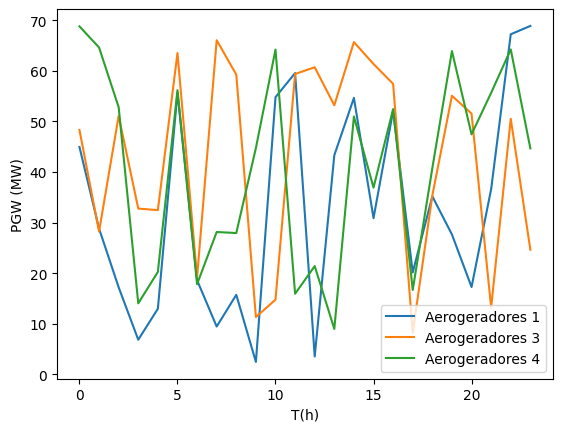

In [26]:
# Applying wnd and scen to ieee118 and storiing wind profiles and load profiles to print later

b6 = B6L8Charged()
ieee118 = IEEE118Charged()

hour = 24
wind_profiles = []
load_profiles = []
for i in range(hour):
    net = deepcopy(b6) 
    apply_wnd_scen(net, rng=rng1)
    apply_load_scen(net, rng=rng2)
    #storing profiles of each wind generator and load at this hour I dont like profile name because it seems like its hourly profile but its just at this hour
    wind_profiles.append([wnd.p_max_mw for wnd in net.wind_generators])
    load_profiles.append([load.p_mw for load in net.loads])

# Now printing the profiles of each wind generator 

for i, wnd in enumerate(b6.wind_generators):
    plt.plot([wind_profiles[h][i] for h in range(hour)], label=f'Aerogeradores {wnd.bus.id}')
plt.xlabel('T(h)')
plt.ylabel('PGW (MW)')
plt.legend()
plt.show()


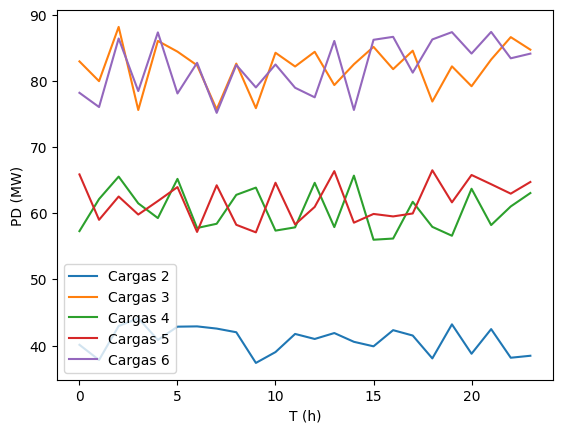

In [28]:
# Now printing the profiles of each load
for i, load in enumerate(b6.loads):
    plt.plot([load_profiles[h][i] for h in range(hour)], label=f'Cargas {load.bus.id}')
plt.xlabel('T (h)')
plt.ylabel('PD (MW)')
plt.legend()
plt.show()

In [32]:
Battery(id=99, bus=net.buses[0], p_max_mw=10, p_min_mw=-10, capacity_mwh=100, soc_mwh=50, cost_charge_mw=-1, cost_discharge_mw=350)

Battery(bus=Bus(id=1, name='Bus_1', btype=SLACK, v=1.000 pu, theta=0.000 deg, p_net=0.010 pu, q_net=0.069 pu, y_sh=0.00+0.00j pu, gens=4, loads=0), id=99, name='Battery_99', p_mw=0.0, q_mvar=0.0, p_max_mw=10, p_min_mw=-10, q_max_mvar=99999, q_min_mvar=0.0, capacity_mwh=100, soc_mwh=50, efficiency_charge=0.95, efficiency_discharge=0.95, cost_charge_mw=-1, cost_discharge_mw=350)

In [39]:
solver = LinearDispatch(net=b6)
solver.solve_loss(verbose=True)

Solução encontrada após 2 iterações.
Perdas Totais do Sistema: 0.5247 MW
Curtailment Total: 27.0772 MW
Shed Total: 57.3295 MW


{'Thermal_Generation':                          P_MW  Dual_Lower_Cost  Dual_Upper_Cost
 ThermalGenerator_1   0.000000           1000.0              0.0
 ThermalGenerator_2  63.977473              0.0              0.0
 ThermalGenerator_3  16.294922              0.0              0.0,
 'Wind_Generation':                  Avaible_MW       P_MW  ...  Dual_Lower_Cost  Dual_Upper_Cost
 WindGenerator_4        70.0  42.922768  ...              0.0              0.0
 WindGenerator_5        70.0  70.000000  ...              0.0          -2000.0
 WindGenerator_6        70.0  70.000000  ...              0.0          -3000.0
 
 [3 rows x 5 columns],
 'Battery': Empty DataFrame
 Columns: []
 Index: [],
 'Load_Shed':         P_MW  P_Shed_MW  Dual_Lower_Cost  Dual_Upper_Cost
 Load_1  40.0   0.000000        17315.271              0.0
 Load_2  80.0   0.000000        38000.000              0.0
 Load_3  60.0   0.000000        37000.000              0.0
 Load_4  60.0   2.476876            0.000              